# Analysis of Bridget Jones's Diary

## Trend Lines From A Sample

/Users/eshvk/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


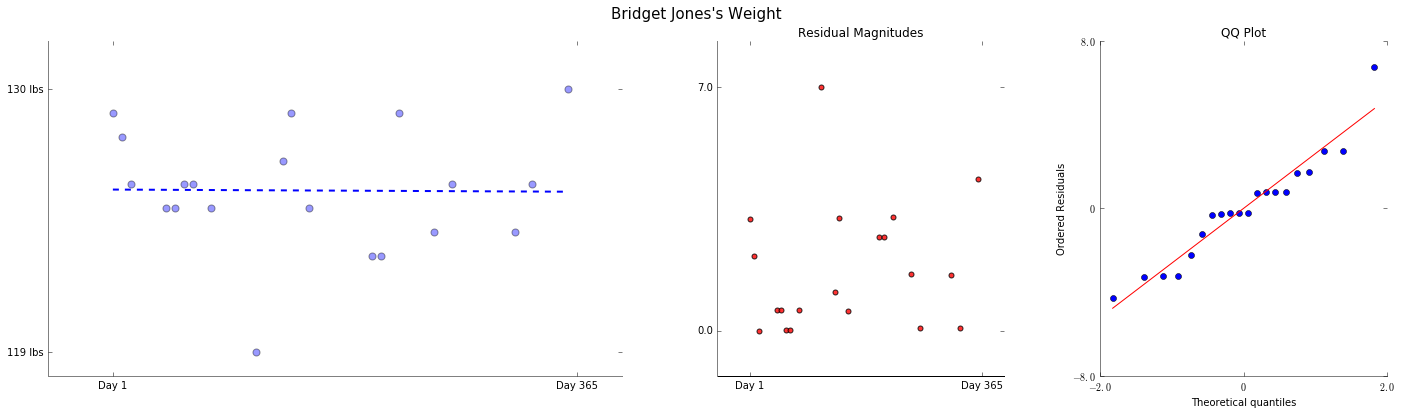

In [2]:
%matplotlib inline
import json
import warnings
warnings.filterwarnings('ignore')
book1 = 'book_1_gist_subsampled.json'
data = json.loads(open(book1).read())
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

day_nos = []
weights = []
for key in sorted(data.iterkeys(), key=int):
    day_nos.append(int(key))
    weights.append(data[key]['weight'])
weights = np.asarray(weights)
day_nos = np.asarray(day_nos)

def lin_reg(x, xp, yp):
    """
        OLS
    """
    m = (np.dot(xp,yp) - (np.sum(xp) * np.sum(yp))/float(yp.size))/(np.dot(xp,xp) - np.sum(xp)**2/float(xp.size))
    c = (np.sum(yp) - m * np.sum(xp))/float(xp.size)
    return m * x + c

trend_line = lin_reg(day_nos, day_nos, weights)
r = trend_line - weights
r_m = np.abs(r)
fig,ax = plt.subplots(nrows=1,ncols=3, gridspec_kw={'width_ratios':[2,1,1]}, facecolor='white')
fig.suptitle('Bridget Jones\'s Weight',fontsize=15)
fig.subplots_adjust(wspace=0.25)
fig.set_size_inches(24, 6)
ax[0].scatter( day_nos, weights, s=50, marker='o', alpha=0.4)
ax[0].plot(day_nos, trend_line, color="blue", linewidth=2.0, linestyle="--", label = "Trend Line")
ax[0].set_yticks([weights.min(), weights.max()])
ax[0].set_yticklabels([str(weights.min()) + ' lbs', str(weights.max()) + ' lbs'])
ax[0].set_xticks([1,365])
ax[0].set_xticklabels(['Day 1', 'Day 365'])
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].spines['left'].set_color('grey')
ax[0].spines['bottom'].set_color('grey')
ax[1].scatter( np.asarray(day_nos), np.asarray(r_m), s=25, c="red", marker='o', alpha='0.8', label="Residual Magnitudes")
ax[1].set_yticks([r_m.min(), r_m.max()])
ax[1].set_yticklabels([str(round(r_m.min())), str(round(r_m.max()))])
ax[1].set_xticks([1,365])
ax[1].set_xticklabels(['Day 1', 'Day 365'])
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].spines['left'].set_color('grey')
ax[1].spines['bottom'].set_color('black')
ax[1].set_title('Residual Magnitudes')
res=stats.probplot(r, dist="norm", plot=ax[2])
ax[2].set_title('QQ Plot')
ax[2].spines['right'].set_color('none')
ax[2].spines['top'].set_color('none')
ax[2].spines['left'].set_color('grey')
ax[2].spines['bottom'].set_color('grey')
ax[2].set_ylabel('Ordered Residuals')
ax[2].set_xticks([-2.0,0,2.0])
ax[2].set_xticklabels([r'$-2.0$', r'$0$', r'$2.0$'])
ax[2].set_yticks([-8.0,0,8.0])
ax[2].set_yticklabels([r'$-8.0$', r'$0$', r'$8.0$'])
plt.show()

There is a small downward trend when fitting a trend line. Note that applying linear regression is possible only when the conditional error, i.e. the spread you would see if you weighed her every day was normally distributed with a constant variance across days. 

The spread of the residuals (_actual weight minus the estimated weight for the day_) is by far not constant. However, it isn't apparent to me that the spread is out of line. I am not quite sure how to find. The $\mathbf{QQ}$ Plot compares the $\mathbf{CDF}$ of the residuals against that of a Standard Normal distribution. This is supposed to lie very close to that line. Again, I am not sure what _very close_ means. 

## Trends From More Days

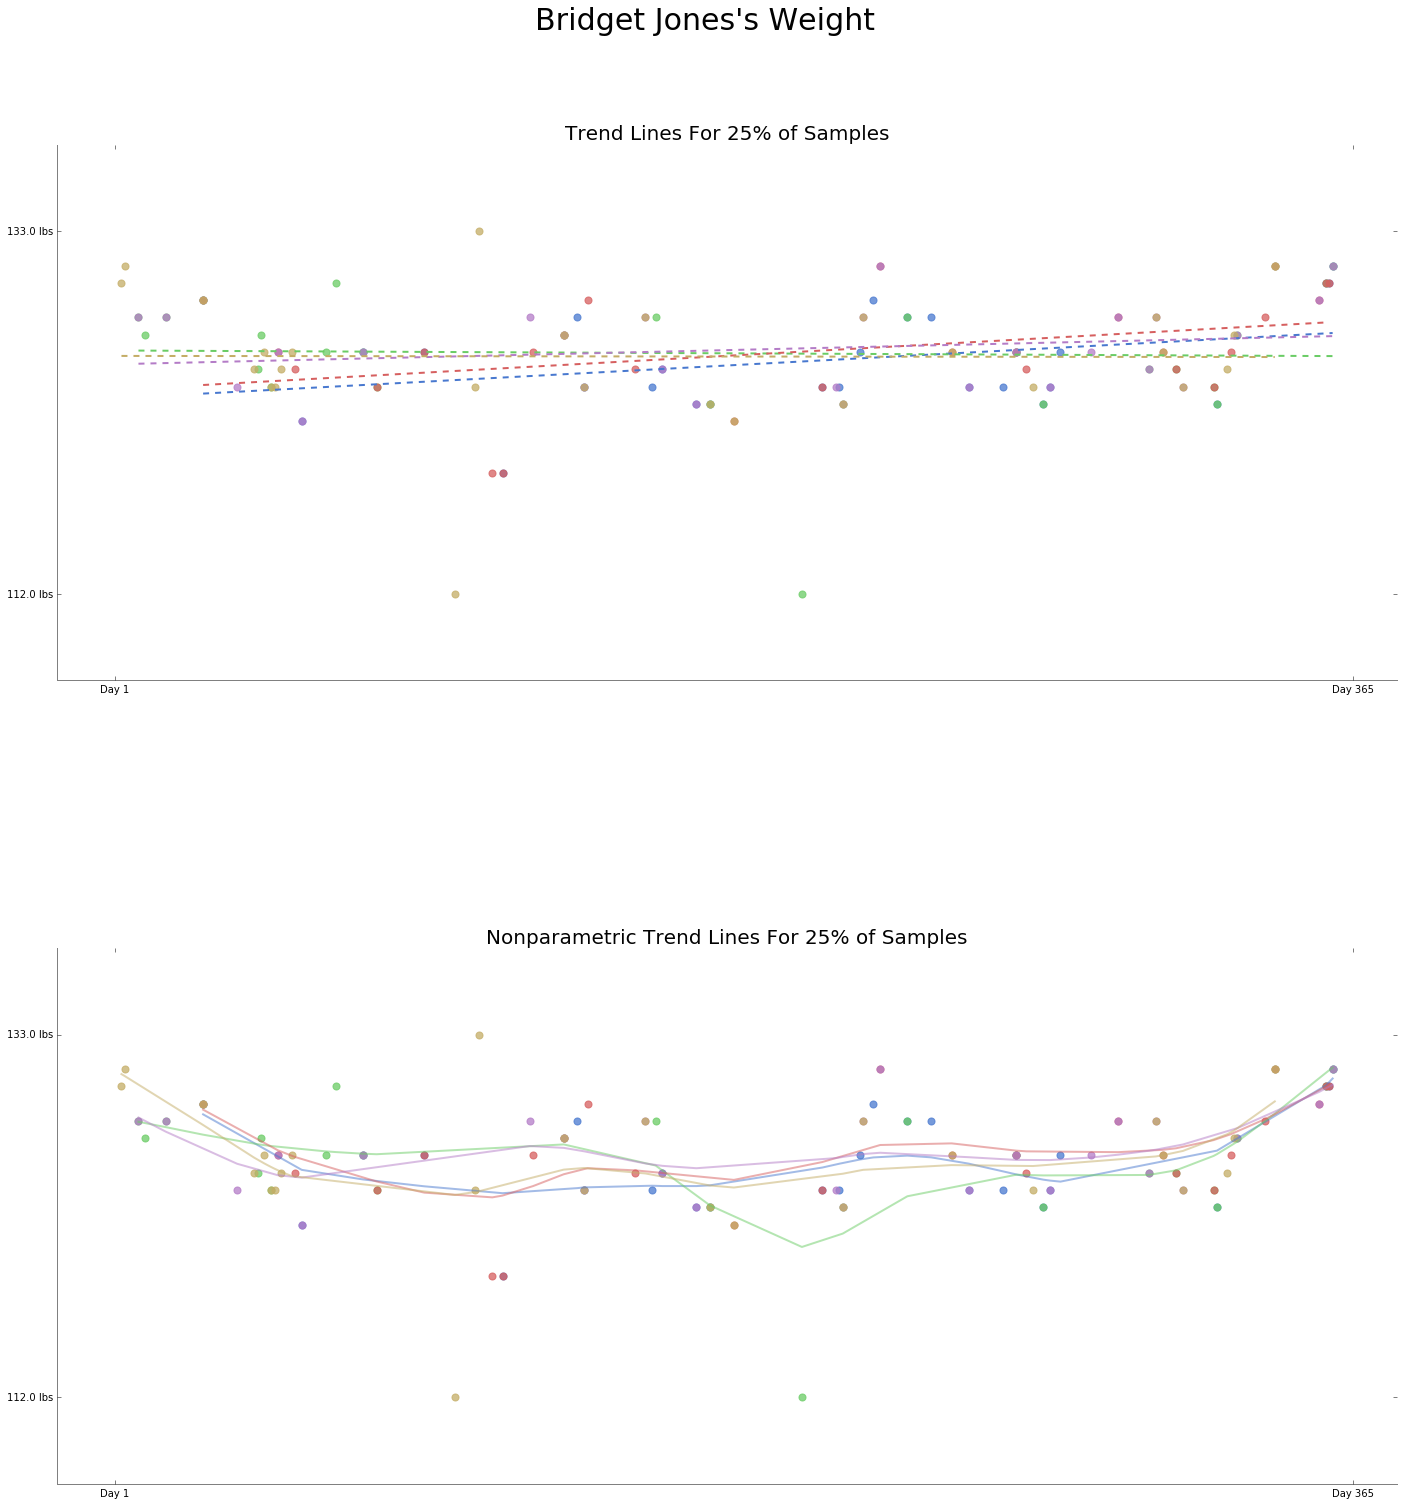

In [5]:
import pandas as pd
bf = pd.read_json('book_1_full.json')
bf = bf.transpose()
bf.reset_index(inplace=True)
bf.rename(columns={'index':'doy'}, inplace=True)
bfc = bf.dropna()
bfc[['doy', 'weight']] = bfc[['doy', 'weight']].apply(pd.to_numeric)
fig,ax = plt.subplots(nrows=2,ncols=1,facecolor='white')
fig.suptitle('Bridget Jones\'s Weight',fontsize=30)
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(24, 24)

def loess( x, h, xp, yp ):
    from numpy import *
    w = exp(-0.5*((x-xp)/h)**2)/sqrt(2*pi*h**2) 
    b = np.dot(w,xp)*np.dot(w,yp) - np.sum(w)*np.sum(w*xp*yp)
    b /= sum(w*xp)**2 - sum(w)*sum(w*xp**2)
    a = ( np.dot(w,yp) - b*np.dot(w,xp) )/np.sum(w)
    return a + b*x

for ii in xrange(0, 2):
    ax[ii].spines['right'].set_color('none')
    ax[ii].spines['top'].set_color('none')
    ax[ii].spines['left'].set_color('grey')
    ax[ii].spines['bottom'].set_color('grey')
    ax[ii].set_ylim((bfc.weight.min() -5.0 ,bfc.weight.max() + 5.0))
    ax[ii].set_yticks([bfc.weight.min(),bfc.weight.max()])
    ax[ii].set_yticklabels([str(round(bfc.weight.min())) + ' lbs', str(round(bfc.weight.max())) + ' lbs'])
    ax[ii].set_xticks([1,365])
    ax[ii].set_xticklabels(['Day 1', 'Day 365'])

colors = [u'#4878cf', u'#6acc65', u'#d65f5f', u'#b47cc7', u'#c4ad66']
# Let us take 5 samples of 20 each
samples = []
for ii in xrange(0,5):
    t = bfc[['doy', 'date','weight']].sample(frac=.25)
    t.sort_values('doy', ascending=True, inplace=True)
    t['lfit'] =  lin_reg(t['doy'], t.doy.values, t.weight.values)
    doyl = t.doy.values.tolist()
    cfit = []
    for doy in doyl:
        cfit.append(loess(doy, 25.0, t.doy.values, t.weight.values)) 
    t['cfit'] = cfit
    samples.append(t)
    ax[0].scatter(t.doy.values, t.weight.values, color=colors[ii], s=50, marker='o', alpha=0.75)
    ax[0].plot(t.doy.values, t.lfit.values, color=colors[ii], linewidth=2.0, linestyle="--", label = "Trend Line %d" % (ii))
    ax[0].set_title('Trend Lines For 25% of Samples', fontsize=20)
    ax[1].scatter(t.doy.values, t.weight.values, color=colors[ii], s=50, marker='o', alpha=0.75)
    ax[1].plot(t.doy.values, t.cfit.values, color=colors[ii], linewidth=2.0, linestyle="-", label = "Trend Line %d" % (ii), alpha=0.5)
    ax[1].set_title('Nonparametric Trend Lines For 25% of Samples', fontsize=20)
plt.show()

Conclusion:

1. Why are trend lines varying?
2. Is the variance high?
3. Is this sign that the linear estimator is high variance?
4. how do i find out?